# Bibliotecas y datos

In [ ]:
import numpy as np
import pandas as pd

#preprocesar texto
import nltk
from nltk.corpus import stopwords
import re

from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.model_selection import train_test_split 


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nltk.download('stopwords')

import matplotlib.pyplot as plt        #Para graficar y visualizar
import seaborn as sns


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocesar(texto):
  #convierte a minúsculas
  texto = texto.lower()

  #elimina stopwords
  stop = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  texto = stop.sub('', texto) 


  #quita direcciones html
  borrar = re.compile('<.*?>')
  texto= re.sub(borrar, '', texto)

  #quita puntuaciones y todo lo que no sea letra y números
  texto = re.sub('[^A-ZÜÖÄa-z0-9]+', ' ', texto)

  #quita numeros
  texto = re.sub(" \d+", " ", texto)
  

  return(texto)

In [ ]:
datos=pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/master/Semana8/spam.csv', encoding='latin-1' )

In [ ]:
datos=pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/master/Semana8/spam.csv', 
                  encoding='latin-1',
                  usecols=['v1','v2'] )
datos.columns=['spam','text']
print(datos.shape)
datos.head()

(5572, 2)


,spam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
datos['spam'].value_counts()

ham     4825
spam     747
Name: spam, dtype: int64

In [ ]:
#balancear los casos
n = 747
spam = datos[datos['spam']=='spam']
ham = datos[datos['spam']=='ham'].sample(n,  random_state=3)

datos_balanceados = spam.append(ham).reset_index(drop=True)
datos_balanceados['spam'].value_counts()


ham     747
spam    747
Name: spam, dtype: int64

# Preprocesar

In [ ]:
datos_balanceados.loc[7,'text']

'England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+'

In [ ]:
preprocesar(datos_balanceados.loc[5,'text'])

'urgent  week free membership   prize jackpot txt word claim  c www dbuk net lccltd pobox ldnw1a7rw18'

In [ ]:

datos_balanceados['text']=datos['text'].apply(preprocesar)


#Vectorizar texto (X)

In [ ]:
#Vectorizar texto
tf = TfidfVectorizer()
mdt_frec = tf.fit_transform(datos_balanceados['text']) 
terminos= tf.get_feature_names()
X = pd.DataFrame(mdt_frec.todense(), index=datos_balanceados.index, columns=terminos)
print(X.shape)
X.head()                                                       


(1494, 3749)


,07732584351,07801543489,08714712388,09066362231,10,100,1000,18,22,25p,26th,449050000301,4mths,500,88800,aah,aaooooright,aathi,aberdeen,ability,abiola,able,abnormally,abt,aburo,ac,acc,accenture,accept,access,accidentally,accommodation,accomodate,accomodations,accordingly,account,accounts,ache,acid,acknowledgement,...,xy,ya,yahoo,yalru,yan,yar,yay,yck,yeah,year,years,yelling,yep,yes,yest,yesterday,yet,yetunde,yf,yi,yijue,ym,yo,yoga,yogasana,youi,yourinclusive,yourjob,youuuuu,yowifes,yoyyooo,yr,yrs,yummy,yun,yup,zaher,zed,zoe,zouk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = pd.get_dummies(datos_balanceados['spam'], drop_first=True)
y.head()

,spam
0,1
1,1
2,1
3,1
4,1


In [ ]:
X.shape

(1494, 3749)

In [ ]:
X.describe()

,07732584351,07801543489,08714712388,09066362231,10,100,1000,18,22,25p,26th,449050000301,4mths,500,88800,aah,aaooooright,aathi,aberdeen,ability,abiola,able,abnormally,abt,aburo,ac,acc,accenture,accept,access,accidentally,accommodation,accomodate,accomodations,accordingly,account,accounts,ache,acid,acknowledgement,...,xy,ya,yahoo,yalru,yan,yar,yay,yck,yeah,year,years,yelling,yep,yes,yest,yesterday,yet,yetunde,yf,yi,yijue,ym,yo,yoga,yogasana,youi,yourinclusive,yourjob,youuuuu,yowifes,yoyyooo,yr,yrs,yummy,yun,yup,zaher,zed,zoe,zouk
count,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,...,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000
mean,0.000669,0.000669,0.000669,0.000669,0.000669,0.000669,0.001339,0.000669,0.000669,0.000669,0.000669,0.000669,0.001339,0.001339,0.000669,0.000669,0.000669,0.001339,0.000669,0.000669,0.003347,0.006693,0.000669,0.006024,0.001339,0.004016,0.002008,0.000669,0.001339,0.001339,0.001339,0.000669,0.000669,0.000669,0.000669,0.013387,0.000669,0.000669,0.000669,0.000669,...,0.000669,0.014056,0.001339,0.000669,0.001339,0.002008,0.001339,0.000669,0.013387,0.008701,0.006024,0.000669,0.001339,0.019411,0.001339,0.006693,0.011379,0.002008,0.000669,0.000669,0.001339,0.000669,0.007363,0.001339,0.000669,0.000669,0.000669,0.000669,0.000669,0.000669,0.000669,0.004016,0.002008,0.001339,0.001339,0.007363,0.000669,0.000669,0.001339,0.000669
std,0.025872,0.025872,0.025872,0.025872,0.025872,0.025872,0.036576,0.025872,0.025872,0.025872,0.025872,0.025872,0.036576,0.036576,0.025872,0.025872,0.025872,0.036576,0.025872,0.025872,0.057773,0.081566,0.025872,0.085624,0.036576,0.073090,0.044781,0.025872,0.051743,0.051743,0.036576,0.025872,0.025872,0.025872,0.025872,0.145788,0.025872,0.025872,0.025872,0.025872,...,0.025872,0.152463,0.036576,0.025872,0.036576,0.044781,0.036576,0.025872,0.114963,0.092906,0.077407,0.025872,0.036576,0.138011,0.051743,0.081566,0.106099,0.044781,0.025872,0.025872,0.036576,0.025872,0.085519,0.051743,0.025872,0.025872,0.025872,0.025872,0.025872,0.025872,0.025872,0.063266,0.044781,0.036576,0.036576,0.085519,0.025872,0.025872,0.036576,0.025872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

#Normalizar los datos

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Separar conjunto de entrenamiento y prueba

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y['spam'], test_size=0.3, 
                                                     random_state=7, shuffle=True)

print('e-mail totales: {}'.format(datos.shape[0]))
print('e-mail de entrenamiento: {}'.format(X_train.shape[0]))
print('e-mail de prueba: {}'.format(X_test.shape[0]))

e-mail totales: 5572
e-mail de entrenamiento: 1045
e-mail de prueba: 449


In [ ]:
#proporción de emails por clase en el conjunto de entrenamiento
y_train.value_counts(normalize=True)

0    0.509091
1    0.490909
Name: spam, dtype: float64

In [ ]:
#proporción de emails por clases en el conjunto de prueba
y_test.value_counts(normalize=True)

1    0.521158
0    0.478842
Name: spam, dtype: float64

#  Clasificador Linear Discriminant Analisis


##Entrenamiento

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

## Evaluación del modelo

In [ ]:
y_pred = lda.predict(X_test)

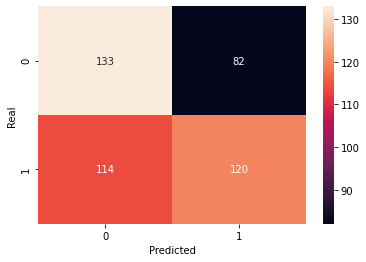

In [ ]:
data = {'Y_Real':  y_test,
        'Y_Prediccion':y_pred
        }

df = pd.DataFrame(data, columns=['Y_Real','Y_Prediccion'])
confusion_matrix = pd.crosstab(df['Y_Real'], df['Y_Prediccion'], rownames=['Real'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

In [ ]:

print('Exactitud: ', format(accuracy_score(y_test, y_pred)))

# emails clasificados como spam que realmente lo son entre todos los clasificados como spam
print('\nPrecisión: ', format(precision_score(y_test, y_pred)))  

# emails clasificados como spam que realmente lo son entre todos los spam
print('\nSensibilidad: ', format(recall_score(y_test, y_pred)))

#Peso medio entre Presición y Sensibilidad
print('\nF1 score: ', format(f1_score(y_test, y_pred)))

Exactitud:  0.5634743875278396

Precisión:  0.594059405940594

Sensibilidad:  0.5128205128205128

F1 score:  0.5504587155963302
